In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df['avg_temp'] = df[['temp_max', 'temp_min']].mean(axis=1)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,avg_temp
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,8.90
1,2012-01-02,10.9,10.6,2.8,4.5,rain,6.70
2,2012-01-03,0.8,11.7,7.2,2.3,rain,9.45
3,2012-01-04,20.3,12.2,5.6,4.7,rain,8.90
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5.85


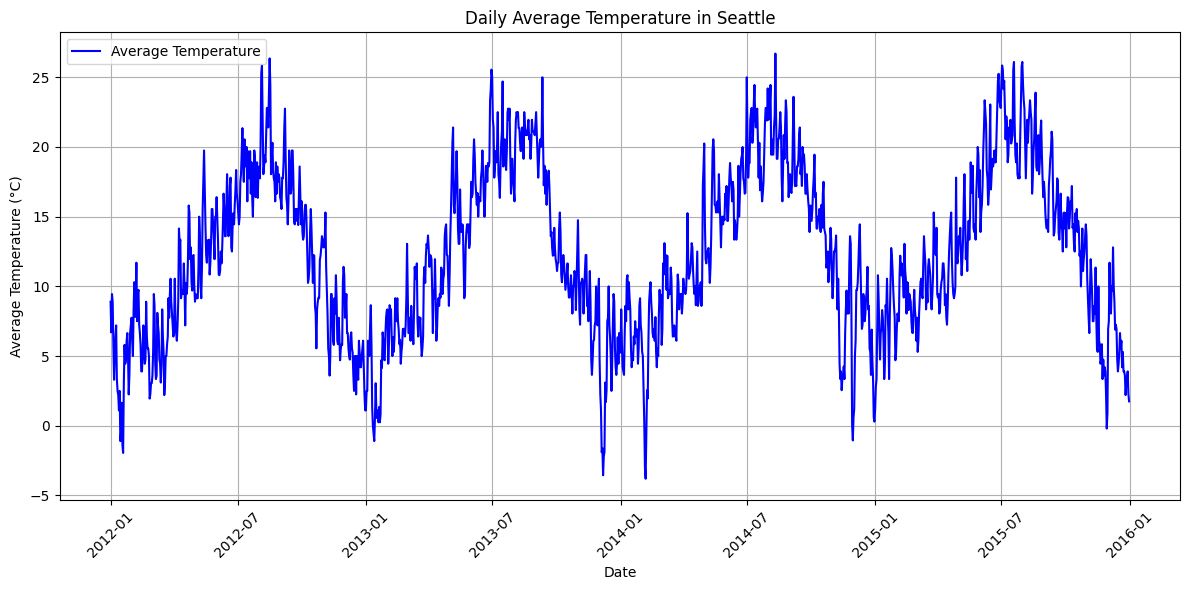

In [ ]:
# Plotting the average temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['avg_temp'], label='Average Temperature', color='b')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Daily Average Temperature in Seattle')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Extract day of year as feature from the date
df['day_of_year'] = df['date'].dt.dayofyear
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,avg_temp,day_of_year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,8.90,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,6.70,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,9.45,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,8.90,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5.85,5


In [ ]:
X = df['day_of_year']
y = df['avg_temp']

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Absolute Error: 5.082969722251305
Mean Squared Error: 36.870307838657446
Root Mean Squared Error: 6.07209254200374


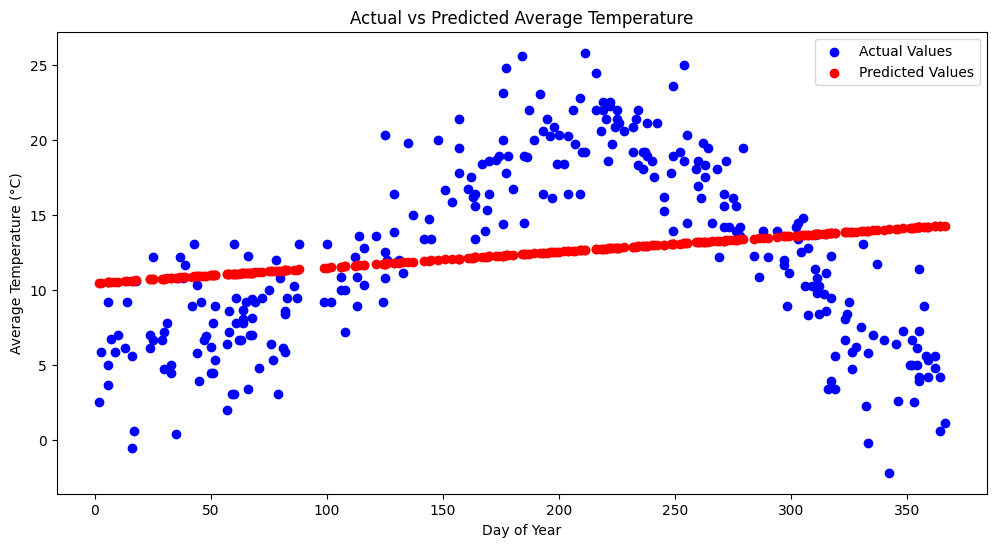

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()

Mean Absolute Error: 2.480091915005738
Mean Squared Error: 10.425191253578854
Root Mean Squared Error: 3.228806475089341


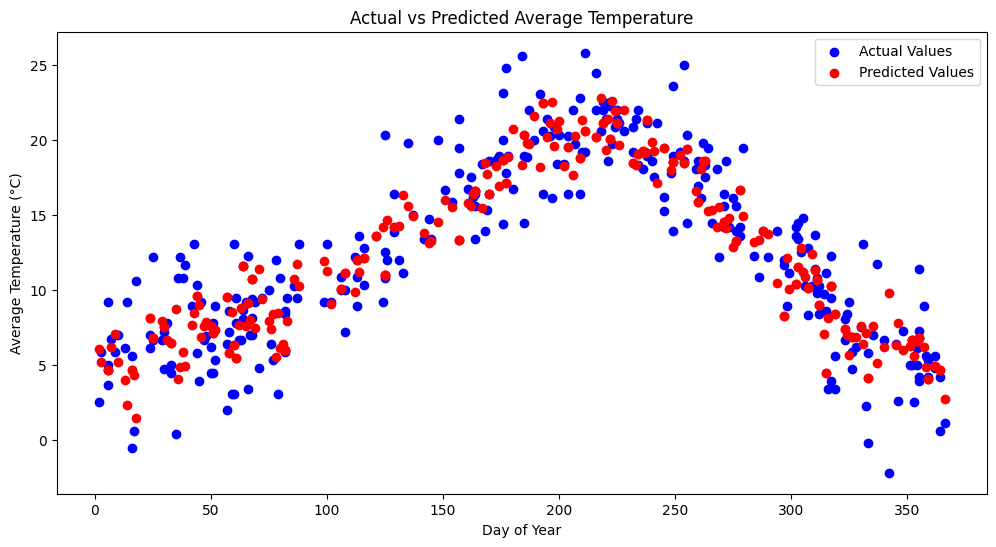

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Initialize the model (Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()


Mean Absolute Error: 2.6382536973833903
Mean Squared Error: 11.792554749715585
Root Mean Squared Error: 3.4340289383922764


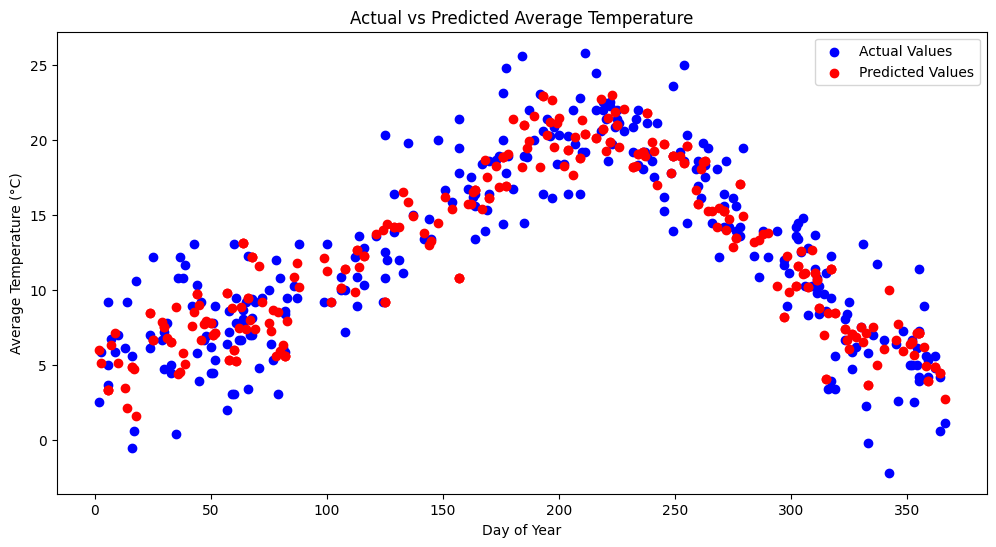

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Changed to DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize the model (Decision Tree Regressor)
model = DecisionTreeRegressor(random_state=42)  # Changed to DecisionTreeRegressor

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()


Mean Absolute Error: 2.0755583424332964
Mean Squared Error: 7.476073703259724
Root Mean Squared Error: 2.7342409738828293


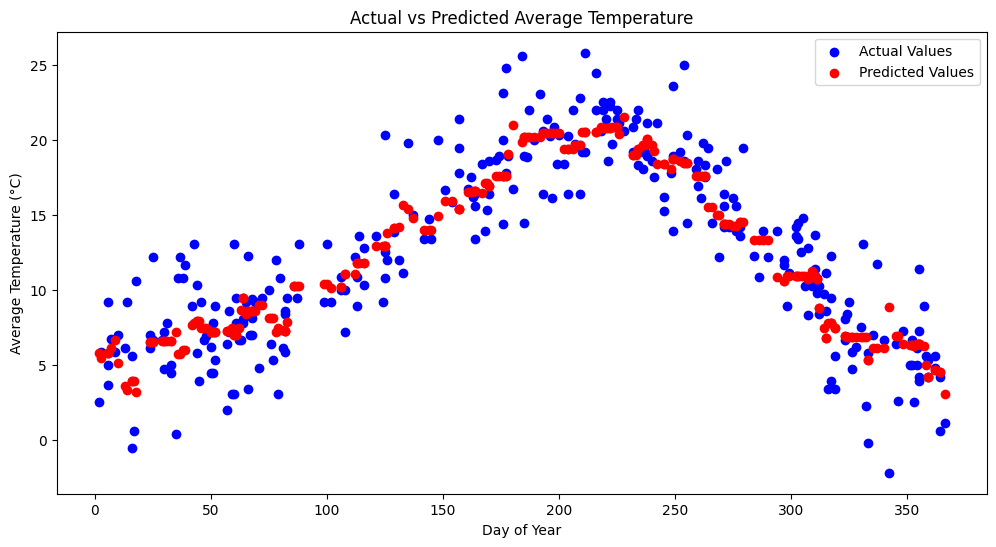

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # Changed to GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize the model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Changed to GradientBoostingRegressor

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()


Epoch 1/20
37/37 [==============================] - 4s 5ms/step - loss: 0.2244
Epoch 2/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0403
Epoch 4/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0385
Epoch 5/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 6/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0367
Epoch 7/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0361
Epoch 9/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0358
Epoch 10/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 11/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0356
Epoch 12/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0353
Epoch 13/20
37/37 [==============================

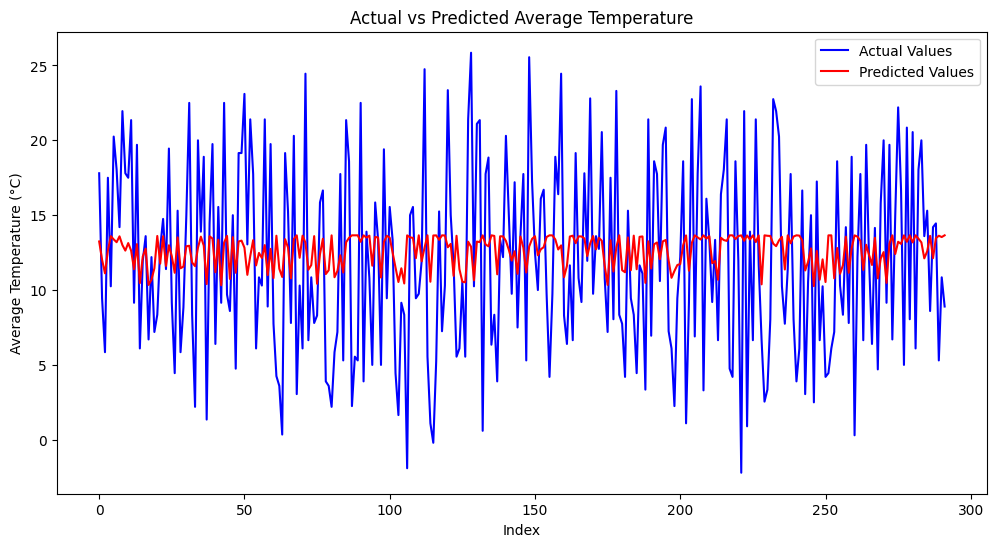

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/seattle-weather.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate the average temperature
df['avg_temp'] = df[['temp_max', 'temp_min']].mean(axis=1)

# Extract day of year as feature from the date
df['day_of_year'] = df['date'].dt.dayofyear

# Define features and target variable
X = df[['day_of_year']].values
y = df['avg_temp'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X[i:(i + time_step), 0])
        ys.append(y[i + time_step, 0])
    return np.array(Xs), np.array(ys)

time_step = 1
X_lstm, y_lstm = create_dataset(X_scaled, y_scaled, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Reshape input data to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], time_step, 1))
X_test = X_test.reshape((X_test.shape[0], time_step, 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(y_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()


Epoch 1/20
37/37 [==============================] - 2s 4ms/step - loss: 0.1121
Epoch 2/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0428
Epoch 3/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0256
Epoch 4/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 8/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 9/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 10/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 11/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 12/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/20
37/37 [==============================

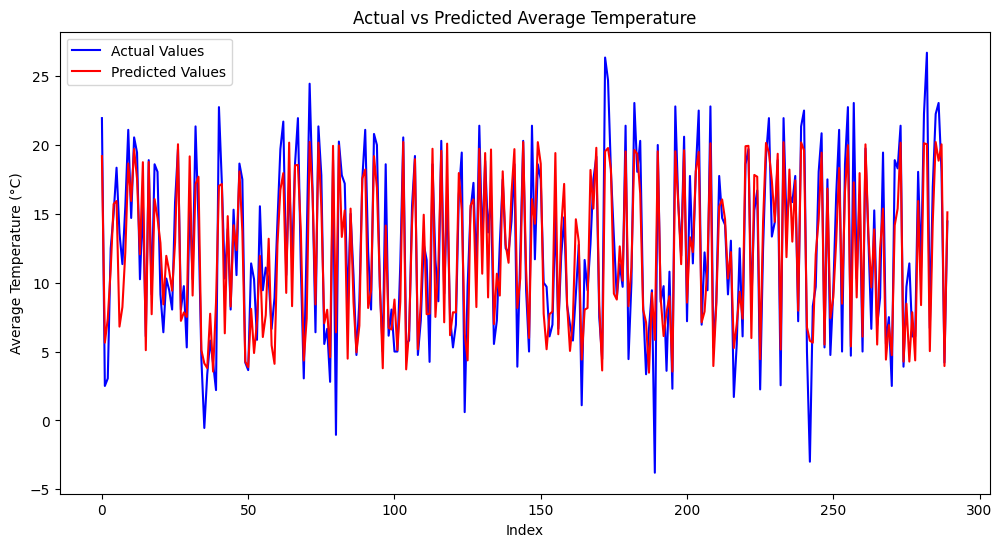

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/seattle-weather.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate the average temperature
df['avg_temp'] = df[['temp_max', 'temp_min']].mean(axis=1)

# Extract day of year as feature from the date
df['day_of_year'] = df['date'].dt.dayofyear

# Define features and target variable
X = df[['day_of_year']].values
y = df['avg_temp'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Prepare data for CNN
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X[i:(i + time_step), 0])
        ys.append(y[i + time_step, 0])
    return np.array(Xs), np.array(ys)

time_step = 10  # Increased time step for CNN
X_cnn, y_cnn = create_dataset(X_scaled, y_scaled, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# Reshape input data to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(y_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def predict_temperature(model, date, scaler_X, scaler_y, time_step=10):
    # Convert date to day of the year
    date = pd.to_datetime(date)
    day_of_year = date.dayofyear

    # Prepare input data
    input_data = np.array([day_of_year] * time_step).reshape(-1, 1)
    input_data = scaler_X.transform(input_data)

    # Reshape input data for the model
    input_data = input_data.reshape((1, time_step, 1))

    # Make prediction
    y_pred_scaled = model.predict(input_data)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    return y_pred[0, 0]

# Example usage
date = '2024-12-30'  # Replace with your date
predicted_temp = predict_temperature(model, date, scaler_X, scaler_y, time_step=10)
print(f'Predicted Temperature for {date}: {predicted_temp:.2f}°C')


1/1 [==============================] - 0s 97ms/step
Predicted Temperature for 2024-12-30: 3.01°C


Epoch 1/20
37/37 [==============================] - 1s 3ms/step - loss: 0.1032
Epoch 2/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 9/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 10/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 11/20
37/37 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 12/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 13/20
37/37 [==============================

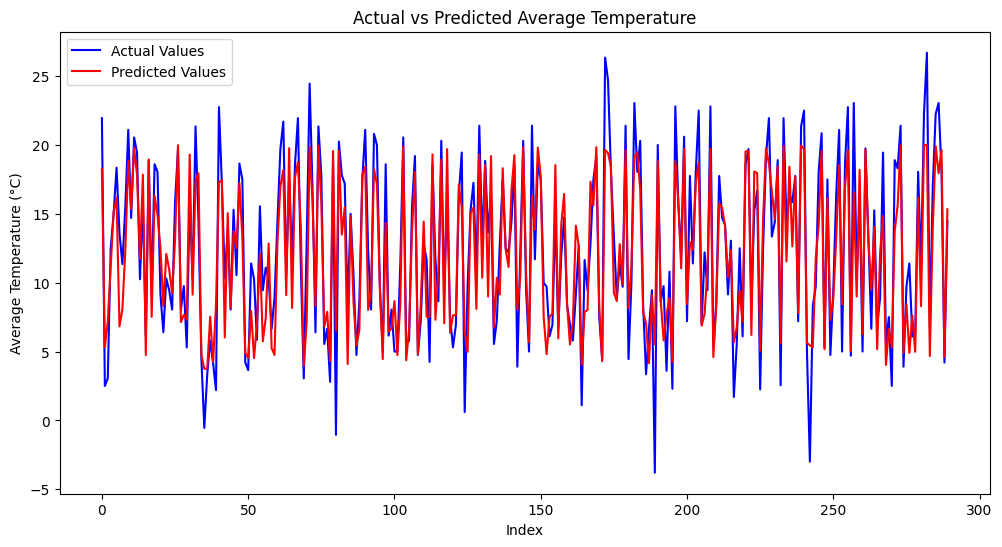

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/seattle-weather.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate the average temperature
df['avg_temp'] = df[['temp_max', 'temp_min']].mean(axis=1)

# Extract day of year as feature from the date
df['day_of_year'] = df['date'].dt.dayofyear

# Define features and target variable
X = df[['day_of_year']].values
y = df['avg_temp'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Prepare data for CNN
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X[i:(i + time_step), 0])
        ys.append(y[i + time_step, 0])
    return np.array(Xs), np.array(ys)

time_step = 10
X_cnn, y_cnn = create_dataset(X_scaled, y_scaled, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# Reshape input data to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(y_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def predict_temperature(model, date, scaler_X, scaler_y, time_step=10):
    # Convert date to day of the year
    date = pd.to_datetime(date)
    day_of_year = date.dayofyear

    # Prepare input data
    input_data = np.array([day_of_year] * time_step).reshape(-1, 1)
    input_data = scaler_X.transform(input_data)

    # Reshape input data for the model
    input_data = input_data.reshape((1, time_step, 1))

    # Make prediction
    y_pred_scaled = model.predict(input_data)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    return y_pred[0, 0]

# Example usage
date = '2024-07-30'  # Replace with your date
predicted_temp = predict_temperature(model, date, scaler_X, scaler_y, time_step=10)
print(f'Predicted Temperature for {date}: {predicted_temp:.2f}°C')


1/1 [==============================] - 0s 35ms/step
Predicted Temperature for 2024-07-30: 19.77°C


In [ ]:
import pickle
from tensorflow.keras.models import save_model

# Save the Keras model as .h5
model.save('cnn_model.h5')

# Save the scalers using pickle
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)
